In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
os.chdir("/Users/a16472/Desktop/MDCF/MDCFpy")
from dcf_python import *

<h3>This is where you load in the region of your calculation</h3>

/Users/a16472/opt/anaconda3/lib/python3.8/site-packages/regions/shapes/rectangle.py:195: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Rectangle(xy=xy, width=width, height=height,


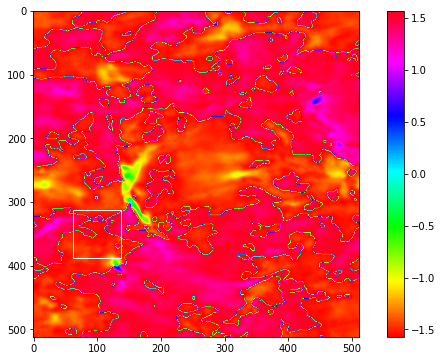

In [2]:
## Find location ##
os.chdir("/Users/a16472/Desktop/MDCF/")


## Loading the polarization angle data
data = fits.open("L1M10_0.1.fits")[0].data


## Coordinates and Size ##
y_cen = (350)
x_cen = (100)
rad = 75

# Taking a smaller region from the entire map.
data_region = data_cut(x_cen, y_cen, rad, data, show=True)

<h3>The MDCF fit to obtain the correlation length and uncorrected field strength ratio.</h3>

/Users/a16472/Desktop/MDCF/MDCFpy/dcf_python.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  delta_r = np.array(delta_r)
/Users/a16472/Desktop/MDCF/MDCFpy/dcf_python.py:89: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  delta_phi = np.array(delta_phi[:-1]) # Last value is added twice for some reason.


25.0
Y-intercept (Uncorrected Turbulent-Ordered Ratio):  0.0020617040721676917
[ Amplitude  Sigma ]
Gaussian parameters are:  [0.00208181 0.10804721]
FWHM:  0.2539109362293222
Number of Bins:  25.0
Analytic Turbulent Corrleation Length:  0.08973656282891514


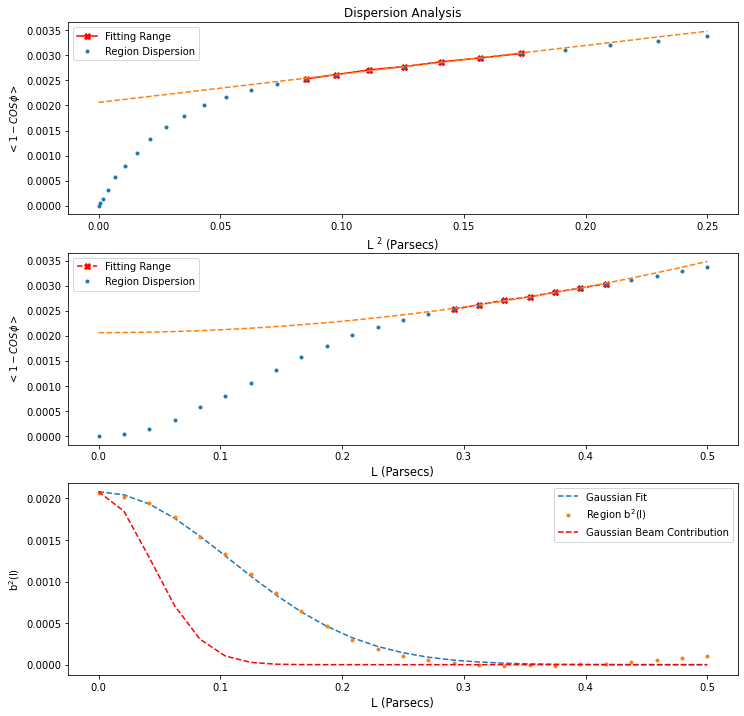

In [3]:
fit0_01 = 15
fitf_01 = 25

# Calculating the structure function analysis of the smaller region.
uncorrected_turbulent_ratio, turbulent_coefficient = MDCF_fit(data_region,
                                                              pixel_scale = 10/512,
                                                              edge_length = 0.5,
                                                              beam_size = 0.1/2.35,
                                                              fit0 = 14,
                                                              fitf = 21)

<h3> Calculating the Turbulent Cells and Corrected Turbulent to Ordered Ratio<h3>

In [4]:
N = turbulent_cells(turbulent_coefficient, 1.45, 0.1/2.35)
print("Turbulent Cells:", round(N))

print("Corrected Turbulent to Ordered Ratio")
print("------------------------------------")
if N > 1:
    print(np.sqrt(round(N) * uncorrected_turbulent_ratio))
else:
    print(np.sqrt(uncorrected_turbulent_ratio))

Turbulent Cells: 9
Corrected Turbulent to Ordered Ratio
------------------------------------
0.1362179747665822
